## Business Problem
A marketing agency aims to maximize the Return on Investment (ROI) for its clients’ advertising campaigns. The agency has conducted two major campaigns — one on Facebook Ads and another on Google AdWords — and seeks to determine which platform performs better in terms of clicks, conversions, and cost-effectiveness.
By comparing both campaigns, the goal is to identify the platform that delivers higher engagement and conversions at a lower cost, enabling the agency to optimize resource allocation and improve future marketing strategies.

##  Research Questions

---


###  Performance Comparison

- How do the daily trends in **views**, **clicks**, and **conversions** differ between **Facebook** and **AdWords** campaigns?  
- Which platform achieves a higher **Click-Through Rate (CTR)** and **Conversion Rate (CR)** over time?

---

###  Cost Efficiency

- Which platform offers a lower **Cost per Click (CPC)** and higher **Return on Investment (ROI)**?  
- How does **ad spending** influence the number of **conversions** on each platform?

---

###  Trend and Seasonality

- Are there any **seasonal patterns** or specific time periods (e.g., months or quarters) where one platform performs better than the other?  
- Does **ad performance** fluctuate during **weekdays vs. weekends**?

---

###  Correlation Analysis

- What is the **relationship** between **Ad Views**, **Clicks**, and **Conversions** on each platform?  
- Does increasing the **ad budget (cost)** significantly impact **CTR** or **Conversion Rate**?

---

###  Optimization Insight

- If the agency wants to **maximize conversions at minimal cost**, which **platform** and **time period** should be prioritized?  
- How can the **marketing budget** be distributed between **Facebook** and **AdWords** to achieve **optimal ROI**?


In [21]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as st
import numpy as np
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score, mean_squared_error
from statsmodels.tsa.seasonal import seasonal_decompose
from statsmodels.tsa.stattools import coint
import warnings
warnings.filterwarnings('ignore')

## Data Description
The dataset represents the performance comparison between two advertising platforms — Facebook Ads and Google AdWords — over the course of the year 2019.
Each record corresponds to a single day, resulting in 365 entries, and includes various key performance indicators (KPIs) used to evaluate campaign success.

The dataset contains the following features:

Date: Day-wise record from January 1st, 2019 to December 31st, 2019.

Ad Views: Total number of times the ad was displayed.

Ad Clicks: Number of times users clicked on the ad.

Ad Conversions: Number of successful conversions achieved from the ad.

Cost per Ad: The cost incurred for running the Facebook ad campaign.

Click-Through Rate (CTR): Ratio of ad clicks to ad views, indicating engagement effectiveness.

Conversion Rate: Ratio of conversions to clicks, reflecting the campaign’s ability to drive actions.

Cost per Click (CPC): Average cost spent per individual click on the ad.

In [22]:
# loading the dataset
df = pd.read_csv('marketing_campaign.csv')

In [23]:
df.columns

Index(['Date', 'Facebook Ad Campaign', 'Facebook Ad Views',
       'Facebook Ad Clicks', 'Facebook Ad Conversions', 'Cost per Facebook Ad',
       'Facebook Click-Through Rate (Clicks / View)',
       'Facebook Conversion Rate (Conversions / Clicks)',
       'Facebook Cost per Click (Ad Cost / Clicks)', 'AdWords Ad Campaign',
       'AdWords Ad Views', 'AdWords Ad Clicks', 'AdWords Ad Conversions',
       'Cost per AdWords Ad', 'AdWords Click-Through Rate (Clicks / View)',
       'AdWords Conversion Rate (Conversions / Click)',
       'AdWords Cost per Click (Ad Cost / Clicks)'],
      dtype='object')

In [24]:
# data overview
df.head()

,Date,Facebook Ad Campaign,Facebook Ad Views,Facebook Ad Clicks,Facebook Ad Conversions,Cost per Facebook Ad,Facebook Click-Through Rate (Clicks / View),Facebook Conversion Rate (Conversions / Clicks),Facebook Cost per Click (Ad Cost / Clicks),AdWords Ad Campaign,AdWords Ad Views,AdWords Ad Clicks,AdWords Ad Conversions,Cost per AdWords Ad,AdWords Click-Through Rate (Clicks / View),AdWords Conversion Rate (Conversions / Click),AdWords Cost per Click (Ad Cost / Clicks)
0,1/1/2019,FB_Jan19,2116,18,8,$126,0.83%,42.73%,$7.14,AW_Jan19,4984,59,5,$194,1.18%,8.40%,$3.30
1,1/2/2019,FB_Jan19,3106,36,12,$104,1.15%,34.04%,$2.91,AW_Jan19,4022,71,6,$75,1.77%,7.80%,$1.05
2,1/3/2019,FB_Jan19,3105,26,8,$102,0.84%,31.45%,$3.89,AW_Jan19,3863,44,4,$141,1.13%,9.59%,$3.23
3,1/4/2019,FB_Jan19,1107,27,9,$71,2.45%,34.76%,$2.62,AW_Jan19,3911,49,5,$141,1.26%,11.08%,$2.86
4,1/5/2019,FB_Jan19,1317,15,7,$78,1.10%,47.59%,$5.38,AW_Jan19,4070,55,7,$133,1.36%,12.22%,$2.40


In [25]:
# rows and columns count of the dataset
df.shape

(365, 17)

In [26]:
# datatypes of the columns
df.dtypes

Date                                               object
Facebook Ad Campaign                               object
Facebook Ad Views                                   int64
Facebook Ad Clicks                                  int64
Facebook Ad Conversions                             int64
Cost per Facebook Ad                               object
Facebook Click-Through Rate (Clicks / View)        object
Facebook Conversion Rate (Conversions / Clicks)    object
Facebook Cost per Click (Ad Cost / Clicks)         object
AdWords Ad Campaign                                object
AdWords Ad Views                                    int64
AdWords Ad Clicks                                   int64
AdWords Ad Conversions                              int64
Cost per AdWords Ad                                object
AdWords Click-Through Rate (Clicks / View)         object
AdWords Conversion Rate (Conversions / Click)      object
AdWords Cost per Click (Ad Cost / Clicks)          object
dtype: object

In [27]:
# converting date to datetime
df['Date'] = pd.to_datetime(df['Date'])

In [28]:
# descriptive stats of the campaigns
df.describe()

,Date,Facebook Ad Views,Facebook Ad Clicks,Facebook Ad Conversions,AdWords Ad Views,AdWords Ad Clicks,AdWords Ad Conversions
count,365,365.000000,365.000000,365.000000,365.00000,365.000000,365.000000
mean,2019-07-02 00:00:00,2179.687671,44.049315,11.742466,4717.19726,60.383562,5.980822
min,2019-01-01 00:00:00,1050.000000,15.000000,5.000000,3714.00000,31.000000,3.000000
25%,2019-04-02 00:00:00,1656.000000,35.000000,10.000000,4247.00000,49.000000,5.000000
50%,2019-07-02 00:00:00,2202.000000,43.000000,12.000000,4711.00000,60.000000,6.000000
75%,2019-10-01 00:00:00,2717.000000,54.000000,13.000000,5190.00000,73.000000,7.000000
max,2019-12-31 00:00:00,3320.000000,73.000000,19.000000,5760.00000,89.000000,9.000000
std,NaN,618.074639,12.140559,2.924786,561.11406,14.368225,1.628106


# Comparing Campaigns performance

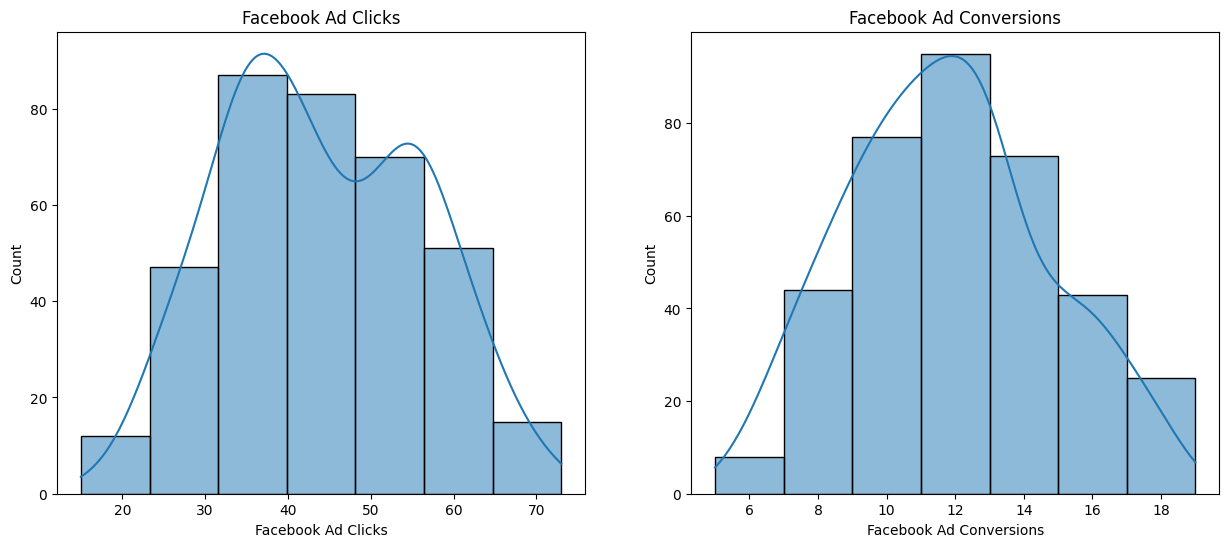

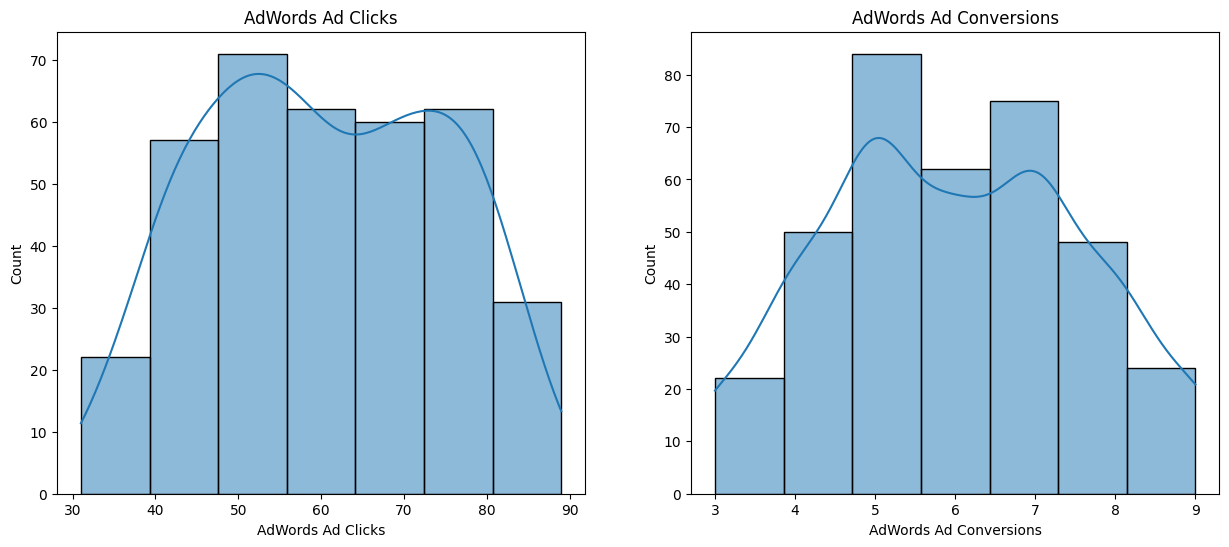

In [29]:
# distribution of the clicks and conversions 
plt.figure(figsize=(15,6))
plt.subplot(1,2,1)
plt.title('Facebook Ad Clicks')
sns.histplot(df['Facebook Ad Clicks'], bins = 7, edgecolor = 'k', kde = True)
plt.subplot(1,2,2)
plt.title('Facebook Ad Conversions')
sns.histplot(df['Facebook Ad Conversions'], bins = 7, edgecolor = 'k', kde = True)
plt.show()


plt.figure(figsize=(15,6))
plt.subplot(1,2,1)
plt.title('AdWords Ad Clicks')
sns.histplot(df['AdWords Ad Clicks'], bins = 7, edgecolor = 'k', kde = True)
plt.subplot(1,2,2)
plt.title('AdWords Ad Conversions')
sns.histplot(df['AdWords Ad Conversions'], bins = 7, edgecolor = 'k', kde = True)
plt.show()

All the histogram are showing somewhat symmetrical shape. This symmetrical shape suggests that the number of clicks and conversions is relatively evenly distributed. In other words, there are not many clicks or conversions that are outliers on either the high or low end.



#### How frequently do we observe days with high numbers of conversions compared to days with low numbers of conversions?

In [30]:
# creating function to calculate the category for the conversions
def create_conversion_category(conversion_col):
    category = []
    for conversion in df[conversion_col]:
        if conversion < 6:
            category.append('less than 6')
        elif 6 <= conversion < 11:
            category.append('6 - 10')
        elif 11 <= conversion < 16:
            category.append('10 - 15')
        else:
            category.append('more than 15')
    return category

# applying function of different campaign's conversions
df['Facebook Conversion Category'] = create_conversion_category('Facebook Ad Conversions')
df['AdWords Conversion Category'] = create_conversion_category('AdWords Ad Conversions')



In [31]:
df[['Facebook Ad Conversions','Facebook Conversion Category','AdWords Ad Conversions','AdWords Conversion Category']].head()


,Facebook Ad Conversions,Facebook Conversion Category,AdWords Ad Conversions,AdWords Conversion Category
0,8,6 - 10,5,less than 6
1,12,10 - 15,6,6 - 10
2,8,6 - 10,4,less than 6
3,9,6 - 10,5,less than 6
4,7,6 - 10,7,6 - 10


In [32]:
df['Facebook Conversion Category'].value_counts()

Facebook Conversion Category
10 - 15         189
6 - 10          128
more than 15     47
less than 6       1
Name: count, dtype: int64

In [33]:
facebook = pd.DataFrame(df['Facebook Conversion Category'].value_counts()).reset_index().rename(columns = {'Facebook Conversion Category':'Category'})
facebook

,Category,count
0,10 - 15,189
1,6 - 10,128
2,more than 15,47
3,less than 6,1


In [34]:
df['AdWords Conversion Category'].value_counts()

AdWords Conversion Category
6 - 10         209
less than 6    156
Name: count, dtype: int64

In [35]:
adwords = pd.DataFrame(df['AdWords Conversion Category'].value_counts()).reset_index().rename(columns = {'AdWords Conversion Category':'Category'})
adwords

,Category,count
0,6 - 10,209
1,less than 6,156


In [36]:
category_df = pd.merge(facebook, adwords, on = 'Category', how = 'outer').fillna(0)
category_df

,Category,count_x,count_y
0,10 - 15,189,0.0
1,6 - 10,128,209.0
2,less than 6,1,156.0
3,more than 15,47,0.0


In [37]:
category_df = category_df.iloc[[3,1,0,2]]
category_df

,Category,count_x,count_y
3,more than 15,47,0.0
1,6 - 10,128,209.0
0,10 - 15,189,0.0
2,less than 6,1,156.0


In [38]:
X_axis = np.arange(len(category_df)) 
X_axis

array([0, 1, 2, 3])

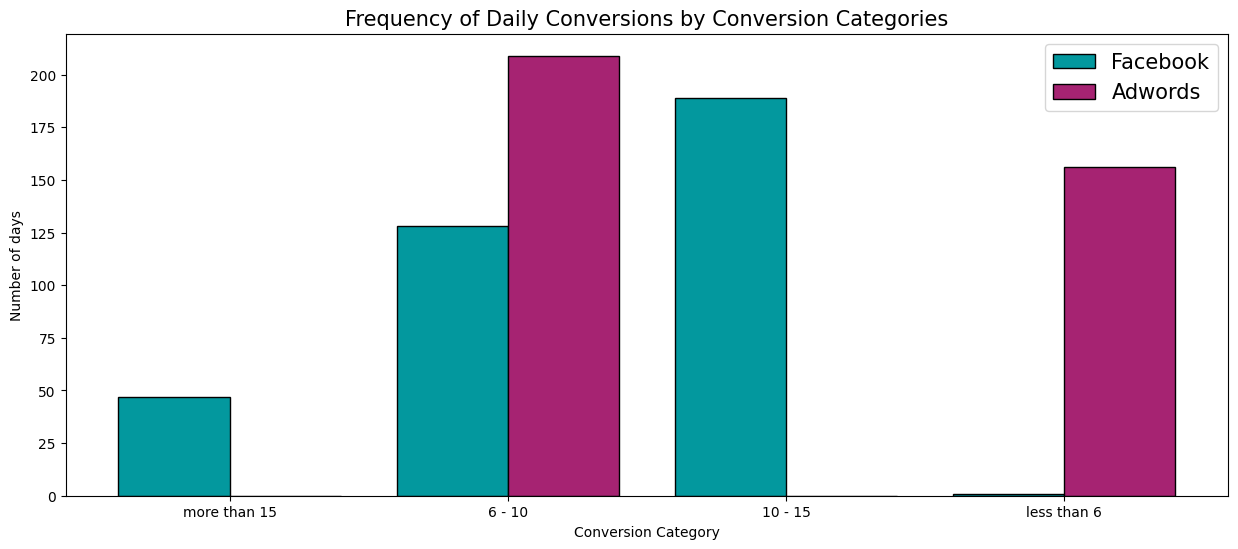

In [39]:
X_axis = np.arange(len(category_df)) 
plt.figure(figsize = (15,6))
plt.bar(X_axis - 0.2, category_df['count_x'], 0.4, label = 'Facebook', color = '#03989E', linewidth = 1, edgecolor = 'k') 
plt.bar(X_axis + 0.2, category_df['count_y'], 0.4, label = 'Adwords', color = '#A62372', linewidth = 1, edgecolor = 'k') 
  
plt.xticks(X_axis, category_df['Category']) 
plt.xlabel("Conversion Category") 
plt.ylabel("Number of days") 
plt.title("Frequency of Daily Conversions by Conversion Categories", fontsize = 15) 
plt.legend(fontsize = 15) 
plt.show() 

- The data suggests Facebook had more frequent higher conversion days than AdWords, which either had very low conversion rates (less than 6) or moderate ones (6 - 10).
- There is a significant variance in the number of high-conversion days between two different campaigns.
- The absence of any days with conversions between 10 - 15 and more than 15 in AdWords indicates a need to review what strategies were changed or what external factors could have influenced these numbers.

#### Do more clicks on the ad really lead to more sales?

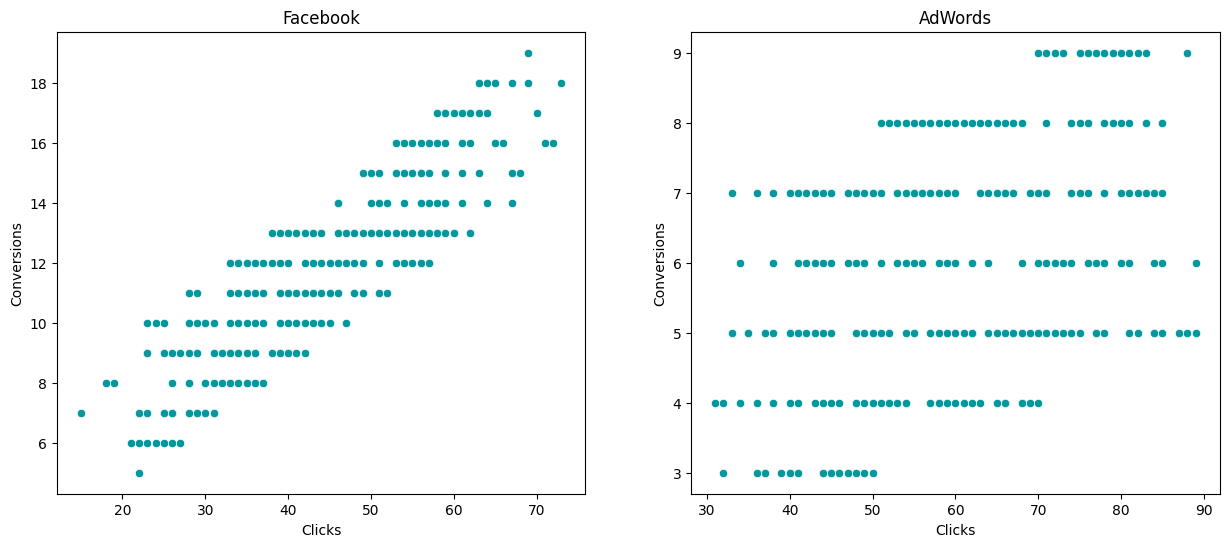

In [40]:
plt.figure(figsize=(15,6))
plt.subplot(1,2,1)
plt.title('Facebook')
sns.scatterplot(x = df['Facebook Ad Clicks'],y = df['Facebook Ad Conversions'], color = '#03989E')
plt.xlabel('Clicks')
plt.ylabel('Conversions')
plt.subplot(1,2,2)
plt.title('AdWords')
sns.scatterplot(x = df['AdWords Ad Clicks'],y = df['AdWords Ad Conversions'], color = '#03989E')
plt.xlabel('Clicks')
plt.ylabel('Conversions')
plt.show()

In [41]:
facebook_corr = df[['Facebook Ad Conversions','Facebook Ad Clicks']].corr()
facebook_corr

,Facebook Ad Conversions,Facebook Ad Clicks
Facebook Ad Conversions,1.000000,0.873775
Facebook Ad Clicks,0.873775,1.000000


In [42]:
adwords_corr = df[['AdWords Ad Conversions','AdWords Ad Clicks']].corr()
adwords_corr

,AdWords Ad Conversions,AdWords Ad Clicks
AdWords Ad Conversions,1.000000,0.447993
AdWords Ad Clicks,0.447993,1.000000


In [43]:
print('Correlation Coeff \n--------------')
print('Facebook :',round(facebook_corr.values[0,1],2))
print('AdWords : ',round(adwords_corr.values[0,1],2))

Correlation Coeff 
--------------
Facebook : 0.87
AdWords :  0.45


- A correlation coefficient of 0.87 indicates a strong positive linear relationship between clicks on Facebook ads and sales. This suggests that as the number of clicks on Facebook ads increases, sales tend to increase as well.
- This strong correlation suggests that Facebook ads are highly effective in driving sales, as a large portion of the variation in sales can be explained by the variation in clicks on Facebook ads.
- The strong correlation between clicks on Facebook ads and sales suggests that Facebook advertising is highly effective in driving sales for the business. Increasing investment in Facebook ads or optimizing their performance could potentially lead to even higher sales.
- A correlation coefficient of 0.45 indicates a moderate positive linear relationship between clicks on AdWords ads and sales. While there is still a positive relationship, it is not as strong as with Facebook ads.
- The moderate correlation between clicks on AdWords ads and sales indicates that while AdWords advertising does contribute to sales, its effectiveness may be influenced by other factors. Further analysis is needed to identify these factors and optimize AdWords campaigns accordingly.

# Hypothesis Testing

**Hypothesis:** Advertising on Facebook will result in a greater number of conversions compared to advertising on AdWords.

**Null Hypothesis (H0):** There is no difference in the number of conversions between Facebook and AdWords, or the number of conversions from AdWords is greater than or equal to those from Facebook.

H0: µ_Facebook ≤ µ_AdWords

**Alternate Hypothesis (H1):** The number of conversions from Facebook is greater than the number of conversions from AdWords.

H1: µ_Facebook > µ_AdWords

In [44]:
print('Mean Conversion \n--------------')
print('Facebook :', round(df['Facebook Ad Conversions'].mean(),2))
print('AdWords :', round(df['AdWords Ad Conversions'].mean(),2))

t_stats, p_value = st.ttest_ind(a = df['Facebook Ad Conversions'], b = df['AdWords Ad Conversions'], equal_var = False)
print('\nT statistic', t_stats, '\np-value',p_value)

# comparing the p value with the significance of 5% or 0.05
if p_value < 0.05:
    print("\np-value is less than significance value, Reject the null hypothesis")
else:
    print("\np-value is greater than significance value, Accept the null hypothesis")

Mean Conversion 
--------------
Facebook : 11.74
AdWords : 5.98

T statistic 32.88402060758184 
p-value 9.348918164530465e-134

p-value is less than significance value, Reject the null hypothesis


- The mean number of conversions from Facebook ads (11.74) is substantially higher than the mean number of conversions from AdWords ads (5.98). This suggests that, on average, Facebook advertising is more effective in generating conversions compared to AdWords advertising.
- The T statistic (32.88) is a measure of the difference between the means of the two groups relative to the variation within the groups. A larger T statistic indicates a greater difference between the means of the two groups.
- The p-value (9.35e-134) is extremely small, indicating strong evidence against the null hypothesis.
- The results strongly support the alternate hypothesis, indicating that the number of conversions from Facebook advertising is indeed greater than the number of conversions from AdWords advertising.
- Facebook advertising appears to be a more effective channel for generating conversions compared to AdWords advertising, based on the sample data analyzed.
- Given the significant difference in conversion rates between Facebook and AdWords, consider reallocating resources towards Facebook advertising efforts. This could involve increasing ad spend, expanding targeting efforts, or experimenting with different ad formats to capitalize on the platform's effectiveness in driving conversions.

# Regression Analysis

#### What will happen when I do go with the Facebook Ad? How many facebook ad conversions can I expect given a certain number of facebook ad clicks?

In [45]:
# independent variable
X = df[['Facebook Ad Clicks']]

# dependent variable
y = df[['Facebook Ad Conversions']]

# initializing and fitting Linear Regression model
reg_model = LinearRegression()
reg_model.fit(X,y)
prediction = reg_model.predict(X)

# model evaluation
r2 = r2_score(y, prediction)*100
mse = mean_squared_error(y, prediction)
print('Accuracy (R2 Score):',round(r2,2),'%')
print('Mean Squared Error:', round(mse,2))

Accuracy (R2 Score): 76.35 %
Mean Squared Error: 2.02


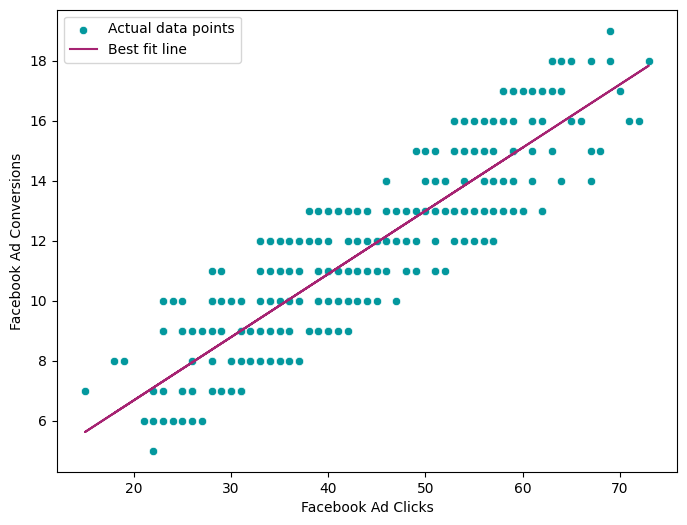

In [46]:
plt.figure(figsize=(8,6))
sns.scatterplot(x = df['Facebook Ad Clicks'],y = df['Facebook Ad Conversions'], color = '#03989E', label = 'Actual data points')
plt.plot(df['Facebook Ad Clicks'], prediction, color = '#A62372', label = 'Best fit line')
plt.legend()
plt.show()

In [47]:
print(f'For {50} Clicks, Expected Conversion : {round(reg_model.predict([[50]])[0][0],2)}')
print(f'For {80} Clicks, Expected Conversion : {round(reg_model.predict([[80]])[0][0],2)}')

For 50 Clicks, Expected Conversion : 13.0
For 80 Clicks, Expected Conversion : 19.31


- The model has a reasonably good predictive power, with an R2 score of 76.35%. This suggests that it can effectively predict Facebook ad conversions based on the number of Facebook ad clicks.
- With the insights provided by the Linear Regression model, businesses can make informed decisions about resource allocation, budget planning, and campaign optimization.
- For instance, knowing the expected number of Facebook ad conversions based on a certain number of Facebook ad clicks can help in setting realistic campaign goals, optimizing ad spend, and assessing the ROI of Facebook advertising efforts.

# Analyzing Facebook Campaign metrics over time.

In [48]:
# cleaning data ( removing unwanted symbols from the columns and converting them to numerical columns)
df['Facebook Click-Through Rate (Clicks / View)'] = df['Facebook Click-Through Rate (Clicks / View)'].apply(lambda x: float(x[:-1]))
df['Facebook Conversion Rate (Conversions / Clicks)'] = df['Facebook Conversion Rate (Conversions / Clicks)'].apply(lambda x: float(x[:-1]))
df['Facebook Cost per Click (Ad Cost / Clicks)'] = df['Facebook Cost per Click (Ad Cost / Clicks)'].apply(lambda x: float(x[1:]))
df['Cost per Facebook Ad'] = df['Cost per Facebook Ad'].apply(lambda x: float(x[1:]))


In [49]:
# filtering for facebook campaign
df = df[['Date','Facebook Ad Views',
       'Facebook Ad Clicks', 'Facebook Ad Conversions', 'Cost per Facebook Ad',
       'Facebook Click-Through Rate (Clicks / View)',
       'Facebook Conversion Rate (Conversions / Clicks)',
       'Facebook Cost per Click (Ad Cost / Clicks)']]

df.head()

,Date,Facebook Ad Views,Facebook Ad Clicks,Facebook Ad Conversions,Cost per Facebook Ad,Facebook Click-Through Rate (Clicks / View),Facebook Conversion Rate (Conversions / Clicks),Facebook Cost per Click (Ad Cost / Clicks)
0,2019-01-01,2116,18,8,126.0,0.83,42.73,7.14
1,2019-01-02,3106,36,12,104.0,1.15,34.04,2.91
2,2019-01-03,3105,26,8,102.0,0.84,31.45,3.89
3,2019-01-04,1107,27,9,71.0,2.45,34.76,2.62
4,2019-01-05,1317,15,7,78.0,1.10,47.59,5.38


#### At what times of the month or days of the week do we observe the conversions?

In [50]:
# extracting month and week day from the date column
df['month'] = df['Date'].dt.month
df['week'] = df['Date'].dt.weekday

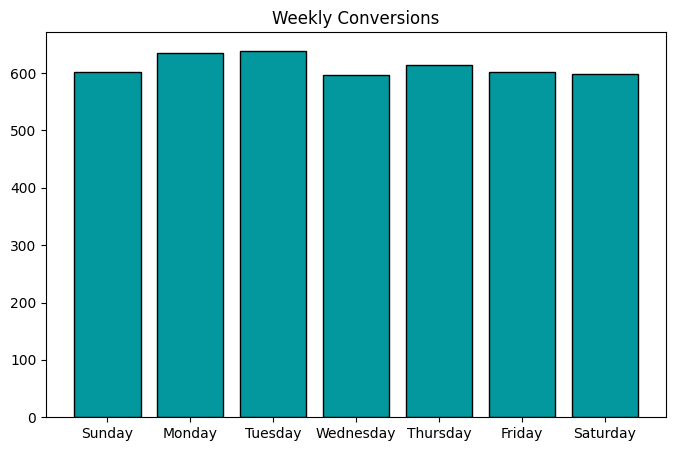

In [51]:
plt.figure(figsize=(8,5))
plt.title('Weekly Conversions')
weekly_conversion = df.groupby('week')[['Facebook Ad Conversions']].sum()
week_names= ['Sunday','Monday','Tuesday','Wednesday','Thursday','Friday','Saturday']
plt.bar(week_names, weekly_conversion['Facebook Ad Conversions'], color = '#03989E', edgecolor = 'k')
plt.show()

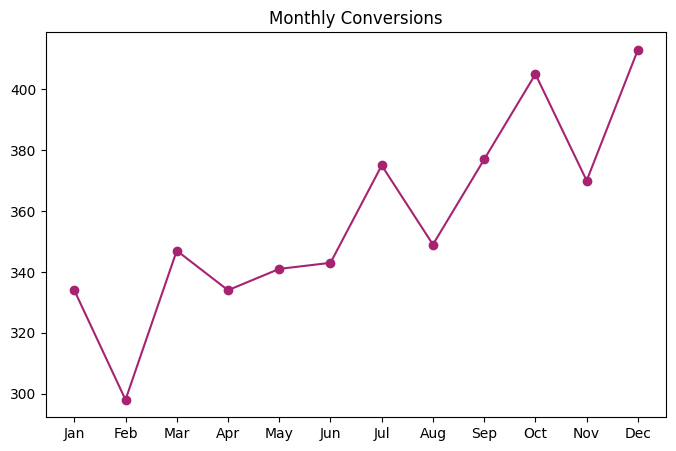

In [52]:
plt.figure(figsize=(8,5))
plt.title('Monthly Conversions')
monthly_conversion = df.groupby('month')[['Facebook Ad Conversions']].sum()
month_names = ['Jan','Feb','Mar','Apr','May','Jun','Jul','Aug','Sep','Oct','Nov','Dec']
plt.plot(month_names, monthly_conversion['Facebook Ad Conversions'],'-o', color = '#A62372')
plt.show()

- Across the weekdays over a year, the total number of conversions remains relatively consistent, indicating a consistent level of engagement throughout the week. However, Mondays and Tuesdays consistently exhibit the highest conversion rates compared to other days, suggesting that the beginning of the workweek sees heightened user engagement or responsiveness to marketing efforts.
- Examining the monthly trend in conversions reveals an overall upward trajectory, indicating a general increase in conversions over time. However, certain months stand out with variations in conversion rates. February, April, May, June, August, and November experience a decline in conversions compared to neighboring months. These periods of decreased conversion rates could be influenced by factors such as seasonal fluctuations, changes in consumer behavior, or adjustments in marketing strategies.

#### How does the Cost Per Conversion (CPC) trend over time?

Cost Per Conversion (CPC): This metric is used to evaluate the cost effectiveness and profitability of an online advertising campaign. This metric helps marketers understand how much they are spending to obtain each conversion, allowing them to optimize their spending and targeting strategies effectively.

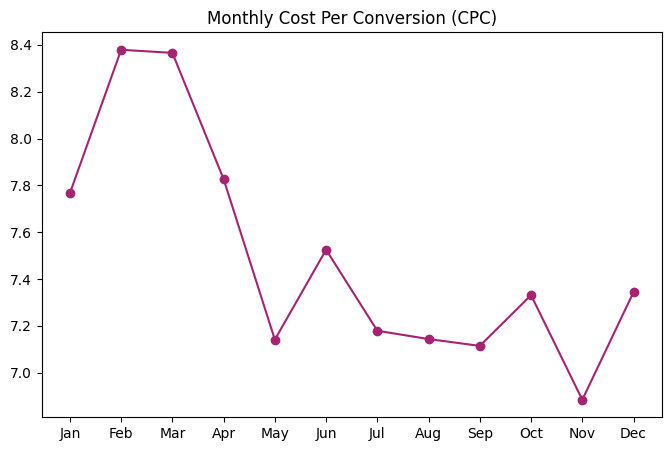

In [53]:
plt.figure(figsize=(8,5))
plt.title('Monthly Cost Per Conversion (CPC)')
monthly_df = df.groupby('month')[['Facebook Ad Conversions','Cost per Facebook Ad']].sum()
monthly_df['Cost per Conversion'] = monthly_df['Cost per Facebook Ad']/monthly_df['Facebook Ad Conversions']
plt.plot(month_names, monthly_df['Cost per Conversion'],'-o', color = '#A62372')
plt.show()

- The CPC trend over the 12-month period shows some fluctuations but overall maintains a relatively stable range.
- May and November have the lowest CPC values, indicating potentially more cost-effective advertising or higher conversion rates during these periods.
- February has the highest CPC value, suggesting that advertising costs may be relatively higher during this month compared to others.
- Lower CPC values in certain months (e.g., May and November) could indicate periods of higher advertising effectiveness or more favorable market conditions.
- Consider allocating more advertising budget to months with historically lower CPC values (e.g., May and November) to maximize ROI.

#### Is there a long-term equilibrium relationship between advertising spend and conversion rates that suggests a stable, proportional impact of budget changes on conversions over time?

In [63]:
score, p_value, _ = coint(df['Cost per Facebook Ad'], df['Facebook Ad Conversions'])
print('Cointegration test score:', score)
print('P-value:', p_value)
if p_value < 0.05:
    print("\np-value is less than significance value, Reject the null hypothesis")
else:
    print("\np-value is greater than significance value, Accept the null hypothesis")

Cointegration test score: -14.755428385103219
P-value: 2.1337375979061323e-26

p-value is less than significance value, Reject the null hypothesis


- Since the p-value is significantly lower than the chosen significance level, we reject the null hypothesis. This indicates that there is a long-term equilibrium relationship between advertising spend (cost) and conversions.

- Businesses can use this understanding of the stable relationship between cost and conversions to optimize their advertising strategies. By investing in campaigns that demonstrate a strong return on investment (ROI) and adjusting spending based on performance, companies can maximize conversions while minimizing costs.

### Predicting Conversions Based on Cost

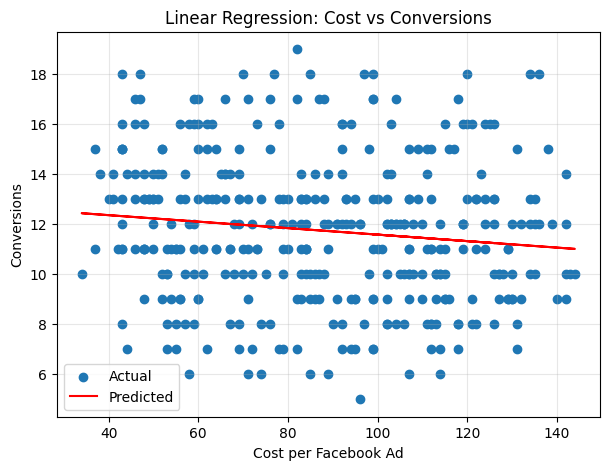

Model Coefficient (slope): -0.0130
Model Intercept: 12.8817


In [67]:
X = df[['Cost per Facebook Ad']]
y = df['Facebook Ad Conversions']

model = LinearRegression().fit(X, y)
predicted = model.predict(X)

plt.figure(figsize=(7,5))
plt.scatter(X, y, label='Actual')
plt.plot(X, predicted, color='r', label='Predicted')
plt.title("Linear Regression: Cost vs Conversions")
plt.xlabel("Cost per Facebook Ad")
plt.ylabel("Conversions")
plt.legend()
plt.grid(alpha=0.3)
plt.show()

print(f"Model Coefficient (slope): {model.coef_[0]:.4f}")
print(f"Model Intercept: {model.intercept_:.4f}")

## RQ3: Relationship between Cost, Conversions, and ROI

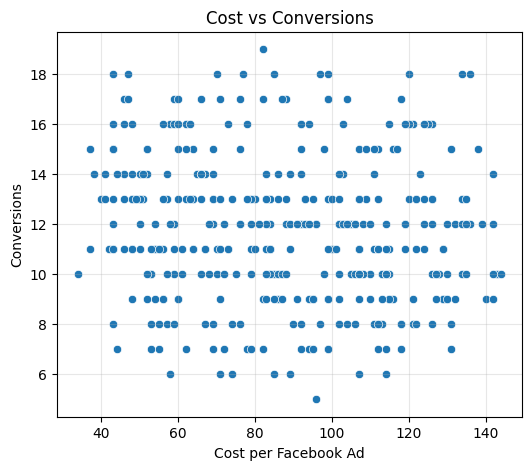

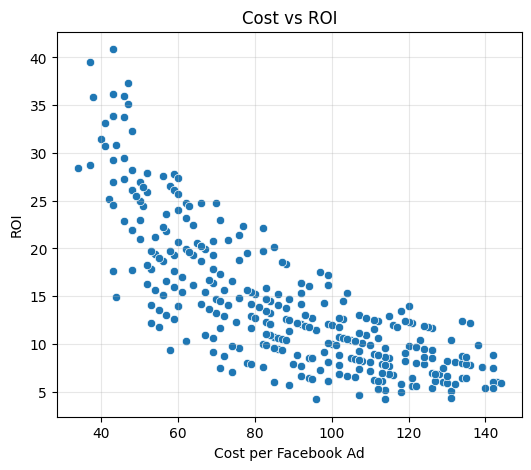

📊 Correlation between Cost, Conversions, and ROI:
                         Cost per Facebook Ad  Facebook Ad Conversions  \
Cost per Facebook Ad                 1.000000                -0.125413   
Facebook Ad Conversions             -0.125413                 1.000000   
Facebook_ROI                        -0.794102                 0.608921   

                         Facebook_ROI  
Cost per Facebook Ad        -0.794102  
Facebook Ad Conversions      0.608921  
Facebook_ROI                 1.000000  


In [68]:
plt.figure(figsize=(6,5))
sns.scatterplot(x='Cost per Facebook Ad', y='Facebook Ad Conversions', data=df)
plt.title("Cost vs Conversions")
plt.xlabel("Cost per Facebook Ad")
plt.ylabel("Conversions")
plt.grid(alpha=0.3)
plt.show()

plt.figure(figsize=(6,5))
sns.scatterplot(x='Cost per Facebook Ad', y='Facebook_ROI', data=df)
plt.title("Cost vs ROI")
plt.xlabel("Cost per Facebook Ad")
plt.ylabel("ROI")
plt.grid(alpha=0.3)
plt.show()

# Correlation check
corr_values = df[['Cost per Facebook Ad', 'Facebook Ad Conversions', 'Facebook_ROI']].corr()
print("📊 Correlation between Cost, Conversions, and ROI:")
print(corr_values)


#### 📈 Findings & Recommendations — Cost, Conversions, and ROI Relationship

**Key Findings:**
- There is a **strong negative correlation (-0.79)** between *Cost per Facebook Ad* and *ROI*, indicating that increasing ad spend significantly **reduces overall cost-effectiveness**.
- A **weak negative correlation (-0.12)** between *Cost per Facebook Ad* and *Conversions* suggests that higher costs **don’t necessarily yield more conversions**.
- A **moderate positive correlation (+0.61)** between *Conversions* and *ROI* confirms that increasing the number of conversions **directly boosts ROI**.

**Interpretation:**
- The campaign exhibits **diminishing returns** — beyond a certain point, additional ad spending results in lower ROI.
- Conversion performance, not ad cost, is the **primary driver of ROI** in this campaign.

**Recommendations:**
- 🧠 Focus on improving **ad quality and targeting** rather than increasing budget.
- 📉 Identify and reduce **inefficient high-cost ads** to enhance profitability.
- 🚀 Invest in strategies that improve **conversion rate optimization (CRO)** — better creatives, audience segmentation, and retargeting.


## Which performance metric (CTR, CR) impacts ROI the most

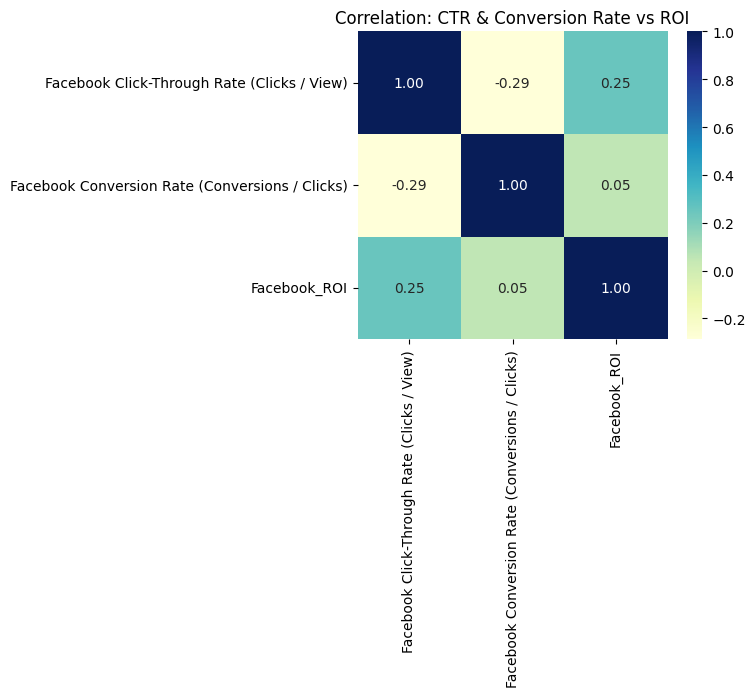

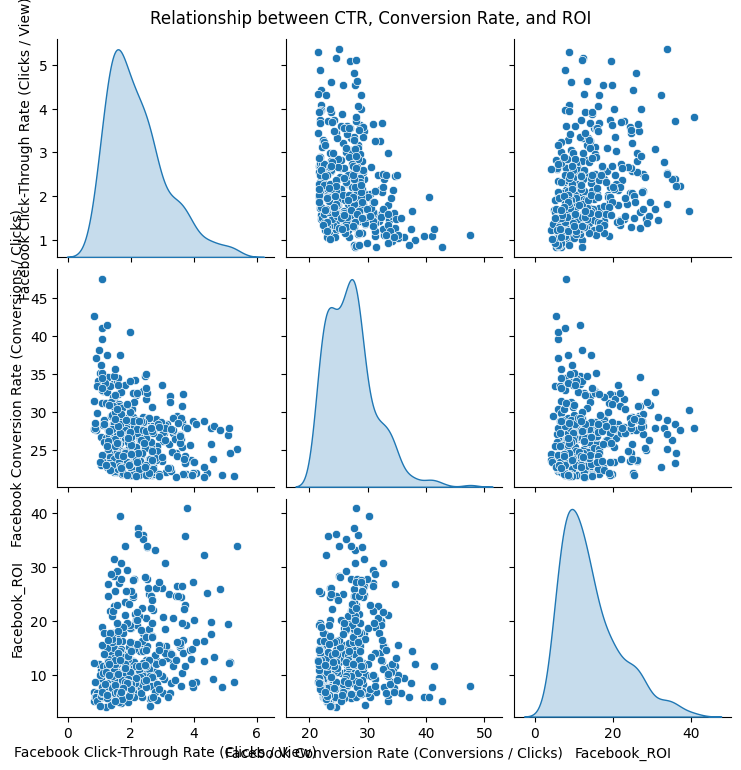

In [70]:
corr_metrics = df[['Facebook Click-Through Rate (Clicks / View)',
                   'Facebook Conversion Rate (Conversions / Clicks)',
                   'Facebook_ROI']].corr()

plt.figure(figsize=(5,4))
sns.heatmap(corr_metrics, annot=True, cmap='YlGnBu', fmt=".2f")
plt.title("Correlation: CTR & Conversion Rate vs ROI")
plt.show()

# Optional: pairplot for visual relationship
sns.pairplot(df[['Facebook Click-Through Rate (Clicks / View)',
                 'Facebook Conversion Rate (Conversions / Clicks)',
                 'Facebook_ROI']], diag_kind='kde')
plt.suptitle("Relationship between CTR, Conversion Rate, and ROI", y=1.02)
plt.show()

### 📈 Findings & Recommendations — CTR & Conversion Rate Impact on ROI

**Key Findings:**
- **CTR (Click-Through Rate)** shows a **weak positive correlation (+0.25)** with ROI, meaning higher engagement slightly improves cost-effectiveness.
- **Conversion Rate** has a **very weak correlation (+0.05)** with ROI — indicating that improving conversions per click alone didn’t strongly influence ROI.
- A mild **negative correlation (-0.29)** between CTR and Conversion Rate suggests that ads attracting many clicks may bring less qualified leads.

**Interpretation:**
- ROI appears to depend more on **how well ads attract clicks (CTR)** than on the **post-click conversion efficiency**.
- However, since both correlations are low, ROI is likely influenced by **multiple interacting factors**, not just engagement rates.

**Recommendations:**
- 🎯 Optimize ad creatives, CTAs, and targeting to **improve CTR**.
- 🔍 Audit landing pages and user flow to **increase Conversion Rate**.
- 🧪 A/B test ad variations to identify which **balance engagement and conversion quality** best.


## Is the ROI significantly different between high-cost and low-cost weeks?

In [71]:
from scipy.stats import ttest_ind

# Divide data into two groups: high-cost and low-cost
median_cost = df['Cost per Facebook Ad'].median()
high_cost = df[df['Cost per Facebook Ad'] > median_cost]['Facebook_ROI']
low_cost  = df[df['Cost per Facebook Ad'] <= median_cost]['Facebook_ROI']

t_stat, p_value = ttest_ind(high_cost, low_cost)

print(f"T-statistic: {t_stat:.4f}")
print(f"P-value: {p_value:.4f}")

if p_value < 0.05:
    print("✅ Statistically significant difference — cost level impacts ROI.")
else:
    print("❌ No significant difference — cost level doesn’t strongly affect ROI.")


T-statistic: -16.7407
P-value: 0.0000
✅ Statistically significant difference — cost level impacts ROI.


### 🧮 Findings & Recommendations — Statistical Impact of Ad Cost on ROI

**T-Test Results:**
- **T-statistic:** -16.74  
- **P-value:** 0.0000  
✅ The difference in ROI between *high-cost* and *low-cost* campaigns is **statistically significant**.

**Interpretation:**
- High-cost ads yield **significantly lower ROI** compared to low-cost ads.
- The negative t-value indicates that **as spending increases, ROI decreases**, confirming the trend of diminishing returns.

**Recommendations:**
- 📉 Reassess ad budget allocation — identify and cut inefficient high-cost campaigns.
- 🧠 Focus on optimizing **conversion rate and targeting** rather than scaling spend.
- 🚀 Implement **cost control strategies** (bid optimization, audience segmentation) to sustain profitability.


## How does performance change over time (monthly/weekly trend)?

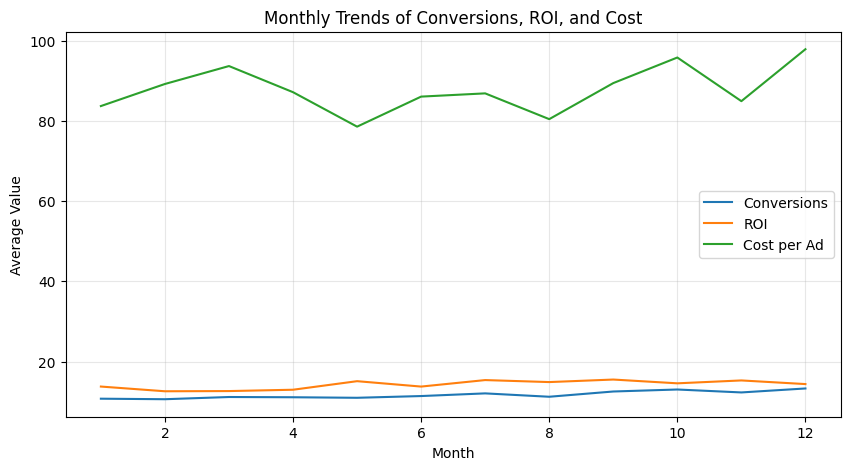

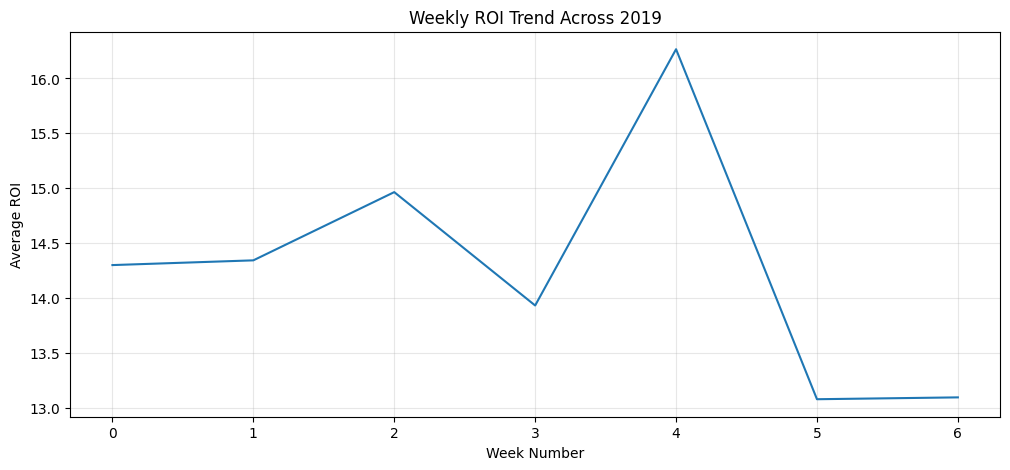

In [73]:
# Monthly trends
monthly_df = df.groupby('month')[['Facebook Ad Conversions', 'Cost per Facebook Ad', 'Facebook_ROI']].mean().reset_index()

plt.figure(figsize=(10,5))
sns.lineplot(x='month', y='Facebook Ad Conversions', data=monthly_df, label='Conversions')
sns.lineplot(x='month', y='Facebook_ROI', data=monthly_df, label='ROI')
sns.lineplot(x='month', y='Cost per Facebook Ad', data=monthly_df, label='Cost per Ad')
plt.title("Monthly Trends of Conversions, ROI, and Cost")
plt.xlabel("Month")
plt.ylabel("Average Value")
plt.legend()
plt.grid(alpha=0.3)
plt.show()

# Weekly ROI trend
weekly_df = df.groupby('week')['Facebook_ROI'].mean().reset_index()
plt.figure(figsize=(12,5))
sns.lineplot(x='week', y='Facebook_ROI', data=weekly_df)
plt.title("Weekly ROI Trend Across 2019")
plt.xlabel("Week Number")
plt.ylabel("Average ROI")
plt.grid(alpha=0.3)
plt.show()

### 📅 RQ6 — Temporal Analysis: Monthly and Weekly Trends

**Key Findings:**
- **Monthly Trends:**
  - Ad costs fluctuate throughout the year, peaking around months **3, 10, and 12** — likely periods of high ad competition or seasonal campaigns.
  - **ROI** shows moderate variation but generally aligns with conversion trends, indicating a consistent relationship between performance and conversions.
  - **Conversions** remain relatively stable with slight peaks in months **6–8**, suggesting mid-year campaign optimizations.

- **Weekly Trends:**
  - ROI trends show **short-term fluctuations**, with notable spikes in certain weeks (e.g., Week 4).
  - This indicates that **weekly campaign adjustments** or **short-term promotions** can significantly impact ROI.

**Interpretation:**
- The campaign demonstrates **seasonal and temporal variability**, suggesting that both **budget allocation** and **ad strategy** should be planned according to high-performing months/weeks.
- Sustained mid-year performance may reflect **optimized audience targeting** or **content effectiveness**.

**Recommendations:**
- 🗓️ Allocate **higher budgets during strong ROI months (6–8 & 10–12)** for maximum impact.
- 🔁 Use **weekly performance reviews** to rapidly identify dips and optimize creatives or bidding.
- 📈 Plan **A/B tests** around low-performing months to uncover improvement areas.


## Can we predict conversions based on ad cost or clicks?

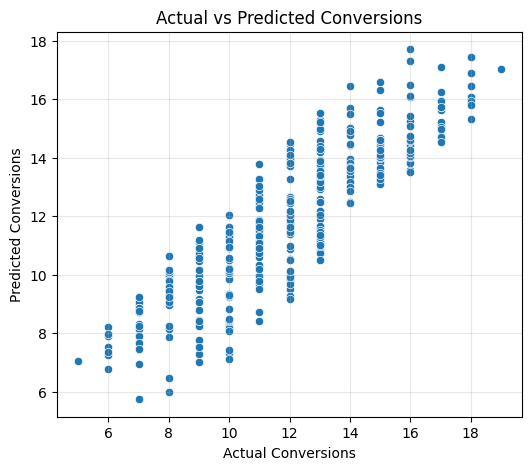

Model Coefficients: {'Cost per Facebook Ad': np.float64(-0.008038271279860797), 'Facebook Ad Clicks': np.float64(0.20947406795503032)}
Model Intercept: 3.22
R² Score: 0.769


In [74]:
from sklearn.linear_model import LinearRegression
import numpy as np

X = df[['Cost per Facebook Ad', 'Facebook Ad Clicks']]
y = df['Facebook Ad Conversions']

model = LinearRegression()
model.fit(X, y)

df['Predicted_Conversions'] = model.predict(X)

plt.figure(figsize=(6,5))
sns.scatterplot(x=y, y=df['Predicted_Conversions'])
plt.title("Actual vs Predicted Conversions")
plt.xlabel("Actual Conversions")
plt.ylabel("Predicted Conversions")
plt.grid(alpha=0.3)
plt.show()

print(f"Model Coefficients: {dict(zip(X.columns, model.coef_))}")
print(f"Model Intercept: {model.intercept_:.2f}")
print(f"R² Score: {model.score(X, y):.3f}")

### 🤖 RQ7 — Predicting Conversions Based on Ad Cost and Clicks

**Model Used:** Linear Regression  
**Independent Variables:** Cost per Facebook Ad, Facebook Ad Clicks  
**Dependent Variable:** Facebook Ad Conversions  

**Model Summary:**
- **Coefficients:**
  - Cost per Facebook Ad → **-0.008**
  - Facebook Ad Clicks → **+0.209**
- **Intercept:** 3.22  
- **R² Score:** 0.769

**Key Findings:**
- The **positive coefficient for Ad Clicks (0.209)** indicates that as the number of ad clicks increases, conversions rise proportionally — clicks are a **strong predictor** of conversions.
- The **negative coefficient for Ad Cost (-0.008)** shows that higher ad spend **slightly reduces conversions**, likely due to inefficient spending or diminishing returns.
- An **R² of 0.769** signifies that approximately **77% of the variance in conversions** is explained by ad cost and clicks — indicating a **strong model fit**.

**Interpretation:**
- Clicks have a **direct and significant influence** on conversions, reinforcing the importance of optimizing for engagement.
- Cost alone does not guarantee conversion growth — effective ad targeting and creative performance matter more than sheer spend.

**Recommendations:**
- 🧠 Focus on improving **CTR (Click-Through Rate)** to drive higher conversions.
- 💸 Monitor **cost efficiency** and reduce spend on underperforming ads.
- 📊 Consider adding additional predictors (e.g., audience type, ad format) to improve prediction accuracy beyond 77%.
